
# Law Replication: Laminar Flame Speeds of H2-Air & Me-Air @100 Atm

Burke Mechanism: \
https://burke.me.columbia.edu/sites/burke.me.columbia.edu/files/content/chem_cti.txt \
Dont forget to use "cti2yaml" to convert the downloaded chem_cti to a Cantera readable YAML file!  \

WebPlotDigitizer: \
https://apps.automeris.io/wpd4/

In [1]:
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt

First we import the Burke YAML as a gas object, identically to gri30

In [2]:
gas1 = ct.Solution('Burke Mech/Burke_chem_cti.yaml') #Burke Mech is saved in a subfolder

Now we set the Flame Characteristics, then solve the flame

In [3]:
fuel = 'H2:1'
oxidizer = 'O2:0.21,N2:0.79'
gas1.set_equivalence_ratio(1.4, fuel, oxidizer) #Composition
gas1.TP = 300, 101325 # Room Temperature, 1 atm

flame1 = ct.FreeFlame(gas1, width=0.03)
flame1.set_refine_criteria(ratio=3, slope=0.06, curve=0.11)
loglevel = 1 # amount of diagnostic output
#flame.show()

In [ ]:
# Solve with mixture averaged transort model 
flame1.transport_model='mixture-averaged'

flame1.solve(loglevel=loglevel, auto=True)
Su0 = flame1.velocity[0]
print(f"Mixture-averaged flamespeed is: {Su0 :.2f} m/s")
output= "adiabatic_flame.yaml"
#flame.save(output,description='mixture-averaged')


Works well, now to compare different thermo models!

In [5]:
phi = np.linspace(1.0,2.1, 23)
print (phi)

fuel = 'H2:1'
oxidizer = 'O2:0.21,N2:0.79'
loglevel = 0 # amount of diagnostic output

[1.   1.05 1.1  1.15 1.2  1.25 1.3  1.35 1.4  1.45 1.5  1.55 1.6  1.65
 1.7  1.75 1.8  1.85 1.9  1.95 2.   2.05 2.1 ]


In [6]:
gas_ideal = ct.Solution('Burke Mech/Burke_chem_cti.yaml')
Su_ideal = []

#Ideal Case
for i in phi:
    gas_ideal.TP = 300, 10132500 # Room Temperature, 100 atm
    gas_ideal.set_equivalence_ratio(i, fuel, oxidizer)
    flameA = ct.FreeFlame(gas_ideal, width=0.03)
    flameA.set_refine_criteria(ratio=3, slope=0.06, curve=0.11)
    flameA.transport_model='mixture-averaged'
    flameA.solve(loglevel=loglevel, auto=True)
    Su0 = flameA.velocity[0]*100
    print(f"Mixture-averaged flamespeed is: {Su0 :.2f} cm/s @phi {i}")
    Su_ideal.append (Su0)

Mixture-averaged flamespeed is: 41.69 cm/s @phi 1.0
Mixture-averaged flamespeed is: 49.12 cm/s @phi 1.05
Mixture-averaged flamespeed is: 56.78 cm/s @phi 1.1
Mixture-averaged flamespeed is: 63.36 cm/s @phi 1.15
Mixture-averaged flamespeed is: 68.69 cm/s @phi 1.2
Mixture-averaged flamespeed is: 72.72 cm/s @phi 1.25
Mixture-averaged flamespeed is: 75.82 cm/s @phi 1.3
Mixture-averaged flamespeed is: 77.90 cm/s @phi 1.35
Mixture-averaged flamespeed is: 79.01 cm/s @phi 1.4
Mixture-averaged flamespeed is: 79.64 cm/s @phi 1.45
Mixture-averaged flamespeed is: 79.74 cm/s @phi 1.5
Mixture-averaged flamespeed is: 79.45 cm/s @phi 1.55
Mixture-averaged flamespeed is: 78.68 cm/s @phi 1.6
Mixture-averaged flamespeed is: 78.37 cm/s @phi 1.65
Mixture-averaged flamespeed is: 77.05 cm/s @phi 1.7000000000000002
Mixture-averaged flamespeed is: 75.57 cm/s @phi 1.75
Mixture-averaged flamespeed is: 73.91 cm/s @phi 1.8
Mixture-averaged flamespeed is: 71.95 cm/s @phi 1.85
Mixture-averaged flamespeed is: 69.96 cm

In [7]:
gas_RK = ct.Solution('Burke Mech/Burke_chem_cti.yaml')
Su_RK = []

#R-K Case
for i in phi:
    gas_RK.TP = 300, 10132500 # Room Temperature, 100 atm
    gas_RK.set_equivalence_ratio(i, fuel, oxidizer)
    flameB = ct.FreeFlame(gas_RK, width=0.03)
    flameB.set_refine_criteria(ratio=3, slope=0.06, curve=0.11)
    flameB.transport_model = 'multicomponent'
    flameB.solve(loglevel=loglevel, auto=True)
    Su0 = flameB.velocity[0]*100
    print(f"Mixture-averaged flamespeed is: {Su0 :.2f} cm/s @phi {i}")
    Su_RK.append (Su0)

Mixture-averaged flamespeed is: 43.27 cm/s @phi 1.0
Mixture-averaged flamespeed is: 50.72 cm/s @phi 1.05
Mixture-averaged flamespeed is: 58.28 cm/s @phi 1.1
Mixture-averaged flamespeed is: 64.66 cm/s @phi 1.15
Mixture-averaged flamespeed is: 69.79 cm/s @phi 1.2
Mixture-averaged flamespeed is: 73.67 cm/s @phi 1.25
Mixture-averaged flamespeed is: 76.59 cm/s @phi 1.3
Mixture-averaged flamespeed is: 78.53 cm/s @phi 1.35
Mixture-averaged flamespeed is: 79.54 cm/s @phi 1.4
Mixture-averaged flamespeed is: 80.10 cm/s @phi 1.45
Mixture-averaged flamespeed is: 80.13 cm/s @phi 1.5
Mixture-averaged flamespeed is: 79.78 cm/s @phi 1.55
Mixture-averaged flamespeed is: 78.97 cm/s @phi 1.6
Mixture-averaged flamespeed is: 78.01 cm/s @phi 1.65
Mixture-averaged flamespeed is: 77.31 cm/s @phi 1.7000000000000002
Mixture-averaged flamespeed is: 75.81 cm/s @phi 1.75
Mixture-averaged flamespeed is: 74.14 cm/s @phi 1.8
Mixture-averaged flamespeed is: 72.23 cm/s @phi 1.85
Mixture-averaged flamespeed is: 70.25 cm

In [ ]:
Su_diff = []

print (Su_RK)
print (Su_ideal)

for a, b in zip(Su_RK, Su_ideal):
    Su_diff.append(a - b)
print (Su_diff)

In [9]:
gas_RK2 = ct.Solution('Burke Mech/Burke_chem_cti.yaml')
Su_RK2 = []

#R-K Case
for i in phi:
    gas_RK2.TP = 300, 10132500 # Room Temperature, 100 atm
    gas_RK2.set_equivalence_ratio(i, fuel, oxidizer)
    flameB = ct.FreeFlame(gas_RK2, width=0.03)
    flameB.set_refine_criteria(ratio=3, slope=0.06, curve=0.11)
    flameB.transport_model = 'multicomponent'
    flameB.soret_enabled = True
    flameB.solve(loglevel=loglevel, auto=True)
    Su0 = flameB.velocity[0]*100
    print(f"Mixture-averaged flamespeed is: {Su0 :.2f} cm/s @phi {i}")
    Su_RK2.append (Su0)

Mixture-averaged flamespeed is: 41.67 cm/s @phi 1.0
Mixture-averaged flamespeed is: 48.22 cm/s @phi 1.05
Mixture-averaged flamespeed is: 55.22 cm/s @phi 1.1
Mixture-averaged flamespeed is: 62.04 cm/s @phi 1.15
Mixture-averaged flamespeed is: 66.43 cm/s @phi 1.2
Mixture-averaged flamespeed is: 70.01 cm/s @phi 1.25
Mixture-averaged flamespeed is: 72.73 cm/s @phi 1.3
Mixture-averaged flamespeed is: 74.57 cm/s @phi 1.35
Mixture-averaged flamespeed is: 75.75 cm/s @phi 1.4
Mixture-averaged flamespeed is: 76.32 cm/s @phi 1.45
Mixture-averaged flamespeed is: 76.42 cm/s @phi 1.5
Mixture-averaged flamespeed is: 76.24 cm/s @phi 1.55
Mixture-averaged flamespeed is: 75.54 cm/s @phi 1.6
Mixture-averaged flamespeed is: 74.70 cm/s @phi 1.65
Mixture-averaged flamespeed is: 73.51 cm/s @phi 1.7000000000000002
Mixture-averaged flamespeed is: 72.07 cm/s @phi 1.75
Mixture-averaged flamespeed is: 70.24 cm/s @phi 1.8
Mixture-averaged flamespeed is: 68.61 cm/s @phi 1.85
Mixture-averaged flamespeed is: 66.81 cm

In [19]:
gas_RK3 = ct.Solution('h2o2.yaml', thermo='ideal-gas')
Su_RK3 = []
#R-K Case
for i in phi:
    gas_RK3.TP = 300, 10132500 # Room Temperature, 100 atm
    gas_RK3.set_equivalence_ratio(i, fuel, oxidizer)
    flameB = ct.FreeFlame(gas_RK3, width=0.03)
    flameB.set_refine_criteria(ratio=3, slope=0.06, curve=0.11)
    flameB.transport_model = 'mixture-averaged'
    flameB.solve(loglevel=loglevel, auto=True)
    Su0 = flameB.velocity[0]*100
    print(f"Mixture-averaged flamespeed is: {Su0 :.2f} cm/s @phi {i}")
    Su_RK3.append (Su0)

Mixture-averaged flamespeed is: 26.63 cm/s @phi 1.0
Mixture-averaged flamespeed is: 31.39 cm/s @phi 1.05
Mixture-averaged flamespeed is: 37.39 cm/s @phi 1.1
Mixture-averaged flamespeed is: 42.11 cm/s @phi 1.15
Mixture-averaged flamespeed is: 45.71 cm/s @phi 1.2
Mixture-averaged flamespeed is: 48.54 cm/s @phi 1.25
Mixture-averaged flamespeed is: 50.59 cm/s @phi 1.3
Mixture-averaged flamespeed is: 52.02 cm/s @phi 1.35
Mixture-averaged flamespeed is: 52.98 cm/s @phi 1.4
Mixture-averaged flamespeed is: 53.41 cm/s @phi 1.45
Mixture-averaged flamespeed is: 53.47 cm/s @phi 1.5
Mixture-averaged flamespeed is: 53.18 cm/s @phi 1.55
Mixture-averaged flamespeed is: 52.68 cm/s @phi 1.6
Mixture-averaged flamespeed is: 51.96 cm/s @phi 1.65
Mixture-averaged flamespeed is: 51.10 cm/s @phi 1.7000000000000002
Mixture-averaged flamespeed is: 50.07 cm/s @phi 1.75
Mixture-averaged flamespeed is: 48.89 cm/s @phi 1.8
Mixture-averaged flamespeed is: 47.54 cm/s @phi 1.85
Mixture-averaged flamespeed is: 46.25 cm

In [22]:
gas_RK4 = ct.Solution('h2o2.yaml', thermo='Redlich-Kwong')
Su_RK4 = []

#R-K Case
for i in phi:
    gas_RK4.TP = 300, 10132500 # Room Temperature, 100 atm
    gas_RK4.set_equivalence_ratio(i, fuel, oxidizer)
    flameB = ct.FreeFlame(gas_RK4, width=0.03)
    flameB.set_refine_criteria(ratio=3, slope=0.02, curve=0.10)
    flameB.transport_model = 'mixture-averaged'
    flameB.solve(loglevel=loglevel, auto=True)
    Su0 = flameB.velocity[0]*100
    print(f"Mixture-averaged flamespeed is: {Su0 :.2f} cm/s @phi {i}")
    Su_RK4.append (Su0)

Mixture-averaged flamespeed is: 26.63 cm/s @phi 1.0
Mixture-averaged flamespeed is: 31.39 cm/s @phi 1.05
Mixture-averaged flamespeed is: 37.39 cm/s @phi 1.1
Mixture-averaged flamespeed is: 42.11 cm/s @phi 1.15
Mixture-averaged flamespeed is: 45.71 cm/s @phi 1.2
Mixture-averaged flamespeed is: 48.54 cm/s @phi 1.25
Mixture-averaged flamespeed is: 50.59 cm/s @phi 1.3
Mixture-averaged flamespeed is: 52.02 cm/s @phi 1.35
Mixture-averaged flamespeed is: 52.98 cm/s @phi 1.4
Mixture-averaged flamespeed is: 53.41 cm/s @phi 1.45
Mixture-averaged flamespeed is: 53.47 cm/s @phi 1.5
Mixture-averaged flamespeed is: 53.18 cm/s @phi 1.55
Mixture-averaged flamespeed is: 52.68 cm/s @phi 1.6
Mixture-averaged flamespeed is: 51.96 cm/s @phi 1.65
Mixture-averaged flamespeed is: 51.10 cm/s @phi 1.7000000000000002
Mixture-averaged flamespeed is: 50.07 cm/s @phi 1.75
Mixture-averaged flamespeed is: 48.89 cm/s @phi 1.8
Mixture-averaged flamespeed is: 47.54 cm/s @phi 1.85
Mixture-averaged flamespeed is: 46.25 cm

The Difference between ideal-gas and r-k Thermo is 0.
The Burke mechanism does not contain EOS variability!

In [28]:
import pandas as pd

Law_SRK = pd.read_csv('Extracted Plots/Law_Fig3_Case2.csv')
Law_SRK.head()
Law_Ideal = pd.read_csv('Extracted Plots/Law_Fig3_Case1.csv')

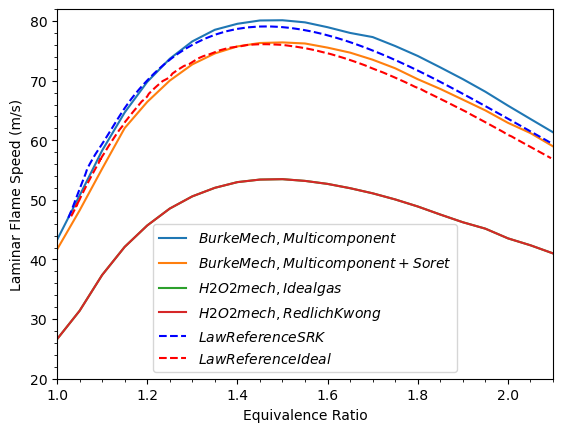

In [32]:
fig, ax1 = plt.subplots()
ax1.plot(phi,Su_RK, label='$BurkeMech, Multicomponent$')
ax1.plot(phi,Su_RK2, label='$BurkeMech, Multicomponent+Soret$')
#ax1.plot(phi,Su_RK3, label='$H2O2mech, Idealgas$')
#ax1.plot(phi,Su_RK4, label='$H2O2mech, RedlichKwong$')
#ax1.plot(phi,Su_ideal, label='$BurkeMech, Mixture Average$')
ax1.plot(Law_SRK['phi'], Law_SRK['v'], 'b--', label='$Law Reference SRK$')
ax1.plot(Law_Ideal['phi'], Law_Ideal['v'], 'r--', label='$Law Reference Ideal$')
ax1.set_xlabel('Equivalence Ratio')
ax1.set_ylabel('Laminar Flame Speed (m/s)')
ax1.set_xlim(1.0, 2.1)
ax1.set_ylim(20, 82)
ax1.set_yticks([20, 30, 40 ,50, 60, 70, 80])
ax1.minorticks_on()
plt.legend()
plt.show()

There are clear differences compared to Law et als case.
This is not good

Using the full gri30 mech for the ideal case takes very long, so we prepare a reduced mech

In [59]:
gas_GRI = ct.Solution('gri30.yaml',thermo='ideal-gas')

# all species from Burke mech, minus Helium (not present in GRI):
species_names = ['H', 'H2', 'O', 'OH', 'H2O', 'O2', 'HO2', 'H2O2', 'N2', 'AR', 'CO', 'CO2'] 
species_list = [gas_GRI.species(name) for name in species_names]

# Create a new list of reactions that involve only the species of interest
reactions_to_keep = []
for i in gas_GRI.reactions():
    reactants = set(i.reactants.keys())  # Set of reactant species names
    products = set(i.products.keys())  # Set of product species names
    # Check if the reaction involves only species of interest
    if reactants.issubset(species_names) and products.issubset(species_names):
        reactions_to_keep.append(i)

# create the new reduced mechanism
gas_ideal = ct.Solution(thermo='ideal-gas', kinetics='gas', species=species_list, reactions=reactions_to_keep, transport_model='mixture-averaged')

# Output the reduced mechanism
print(f"Reduced mechanism contains {len(gas_ideal.species())} species and {len(gas_ideal.reactions())} reactions.")

Reduced mechanism contains 12 species and 34 reactions.
